In [24]:
from datasets import load_dataset

dataset = load_dataset("OpenPipe/hacker-news-scraped-stories")

dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'by', 'time', 'title', 'text', 'url', 'score', 'descendants', 'kids', 'deleted', 'dead', 'scraping_error', 'scraped_title', 'scraped_published_at', 'scraped_byline', 'scraped_body', 'scraped_at', 'scraped_language', 'split'],
        num_rows: 4825995
    })
    val: Dataset({
        features: ['id', 'by', 'time', 'title', 'text', 'url', 'score', 'descendants', 'kids', 'deleted', 'dead', 'scraping_error', 'scraped_title', 'scraped_published_at', 'scraped_byline', 'scraped_body', 'scraped_at', 'scraped_language', 'split'],
        num_rows: 109316
    })
    test: Dataset({
        features: ['id', 'by', 'time', 'title', 'text', 'url', 'score', 'descendants', 'kids', 'deleted', 'dead', 'scraping_error', 'scraped_title', 'scraped_published_at', 'scraped_byline', 'scraped_body', 'scraped_at', 'scraped_language', 'split'],
        num_rows: 548147
    })
})

In [25]:
import polars as pl

# Convert each split to polars and combine
train_df = (
    dataset["train"]
    .to_polars()
    .with_columns(pl.Series(name="split", values=["train"] * len(dataset["train"])))
)
val_df = (
    dataset["val"]
    .to_polars()
    .with_columns(pl.Series(name="split", values=["val"] * len(dataset["val"])))
)
test_df = (
    dataset["test"]
    .to_polars()
    .with_columns(pl.Series(name="split", values=["test"] * len(dataset["test"])))
)

# Combine into single dataframe
df = pl.concat([train_df, val_df, test_df])

df

id,by,time,title,text,url,score,descendants,kids,deleted,dead,scraping_error,scraped_title,scraped_published_at,scraped_byline,scraped_body,scraped_at,scraped_language,split
i64,str,datetime[μs],str,str,str,i64,i64,list[i64],list[str],bool,str,str,str,str,str,datetime[μs],str,str
2,"""phyllis""",2006-10-09 18:30:28,"""A Student's Guide to Startups""",null,"""http://www.paulgraham.com/mit.…",16,0,null,null,null,null,null,null,null,null,null,null,"""train"""
3,"""phyllis""",2006-10-09 18:40:33,"""Woz Interview: the early days …",null,"""http://www.foundersatwork.com/…",7,0,[531602],null,null,"""http_404""","""404 - Page Not Found""",null,null,""" Error - Page Not Found …",2024-11-08 00:09:58,null,"""train"""
4,"""onebeerdave""",2006-10-09 18:47:42,"""NYC Developer Dilemma""",null,"""http://avc.blogs.com/a_vc/2006…",5,0,null,null,null,null,null,null,null,null,null,null,"""train"""
5,"""perler""",2006-10-09 18:51:04,"""Google, YouTube acquisition an…",null,"""http://www.techcrunch.com/2006…",7,0,null,null,null,null,null,null,null,null,null,null,"""train"""
6,"""perler""",2006-10-09 18:56:40,"""Business Intelligence the Inkl…",null,"""http://360techblog.com/2006/10…",4,0,null,null,null,null,null,null,null,null,null,null,"""train"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
42070630,"""Hooke""",2024-11-06 22:37:34,"""Hard Cases for a Handle Theory""",null,"""https://www.cabinetmagazine.or…",1,0,null,null,null,null,null,null,null,null,null,null,"""test"""
42070962,"""june07""",2024-11-06 23:05:35,null,null,null,1,null,null,null,true,null,null,null,null,null,null,null,"""test"""
42071238,"""bentocorp""",2024-11-06 23:32:57,"""New PFAS testing method makes …",null,"""https://phys.org/news/2024-11-…",1,0,null,null,null,null,null,null,null,null,null,null,"""test"""


In [26]:
df = df.filter((pl.col("scraping_error") == "no_error") & pl.col("text").is_null())

df

id,by,time,title,text,url,score,descendants,kids,deleted,dead,scraping_error,scraped_title,scraped_published_at,scraped_byline,scraped_body,scraped_at,scraped_language,split
i64,str,datetime[μs],str,str,str,i64,i64,list[i64],list[str],bool,str,str,str,str,str,datetime[μs],str,str
92,"""greg""",2007-02-19 18:09:20,"""Track users' mouse movements o…",null,"""http://www.clicktale.com/""",10,0,null,null,null,"""no_error""","""Clicktale Is Now Contentsquare…",null,null,"""We've joined forces to create …",2024-11-07 18:14:40,"""en""","""train"""
99,"""pg""",2007-02-19 18:37:29,"""The Google-Powered Business""",null,"""http://blog.radioactiveyak.com…",5,0,null,null,null,"""no_error""","""GoogleOffice (Beta): The Googl…",null,null,""" [ Google Office Tools Homepag…",2024-11-08 05:11:41,"""en""","""train"""
124,"""herdrick""",2007-02-19 22:44:06,"""Startup news link submission s…",null,"""http://news.ycombinator.com/""",58,19,"[133, 139, … 218215]",null,null,"""no_error""","""Hacker News""",null,null,""" 1. Ha…",2024-11-08 03:12:42,"""en""","""train"""
163,"""boris""",2007-02-20 09:10:33,"""How to market to smart people …",null,"""http://codesynthesis.com/~bori…",12,0,null,null,null,"""no_error""","""How to market to smart people""",null,null,""" It should be pretty obvio…",2024-11-08 04:30:27,"""en""","""train"""
190,"""farmer""",2007-02-20 21:36:43,"""Interview with Michael Wesch (…",null,"""http://battellemedia.com/archi…",2,0,null,null,null,"""no_error""","""John Battelle's Search Blog A …","""2007-02-18T21:48:04+00:00""",null,"""Michael Wesch, PhD, is Assista…",2024-11-08 06:28:03,"""en""","""train"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
42057787,"""robaato""",2024-11-06 07:18:46,"""Early morning and evening acti…",null,"""https://www.theguardian.com/so…",2,0,null,null,null,"""no_error""","""Early morning and evening acti…","""2024-11-06T05:00:04.000Z""","""Andrew Gregory""","""Being more active in the morni…",2024-11-08 06:04:44,"""en""","""test"""
42061756,"""DocFeind""",2024-11-06 13:12:33,"""X has always had a Nazi proble…",null,"""https://www.theatlantic.com/te…",3,0,null,null,null,"""no_error""","""X Is a White-Supremacist Site""","""2024-11-05T19:41:17Z""","""Charlie Warzel""","""Elon Musk has made one of Twit…",2024-11-07 22:12:22,"""en""","""test"""
42063552,"""Olshansky""",2024-11-06 15:13:49,"""Vibe Checks Are All You Need""",null,"""https://olshansky.substack.com…",3,0,null,null,null,"""no_error""","""Vibe Checks Are All You Need""","""2024-05-29T20:49:40+00:00""","""Daniel Olshansky""","""I’ve been using ChatGPT since …",2024-11-08 14:57:45,"""en""","""test"""


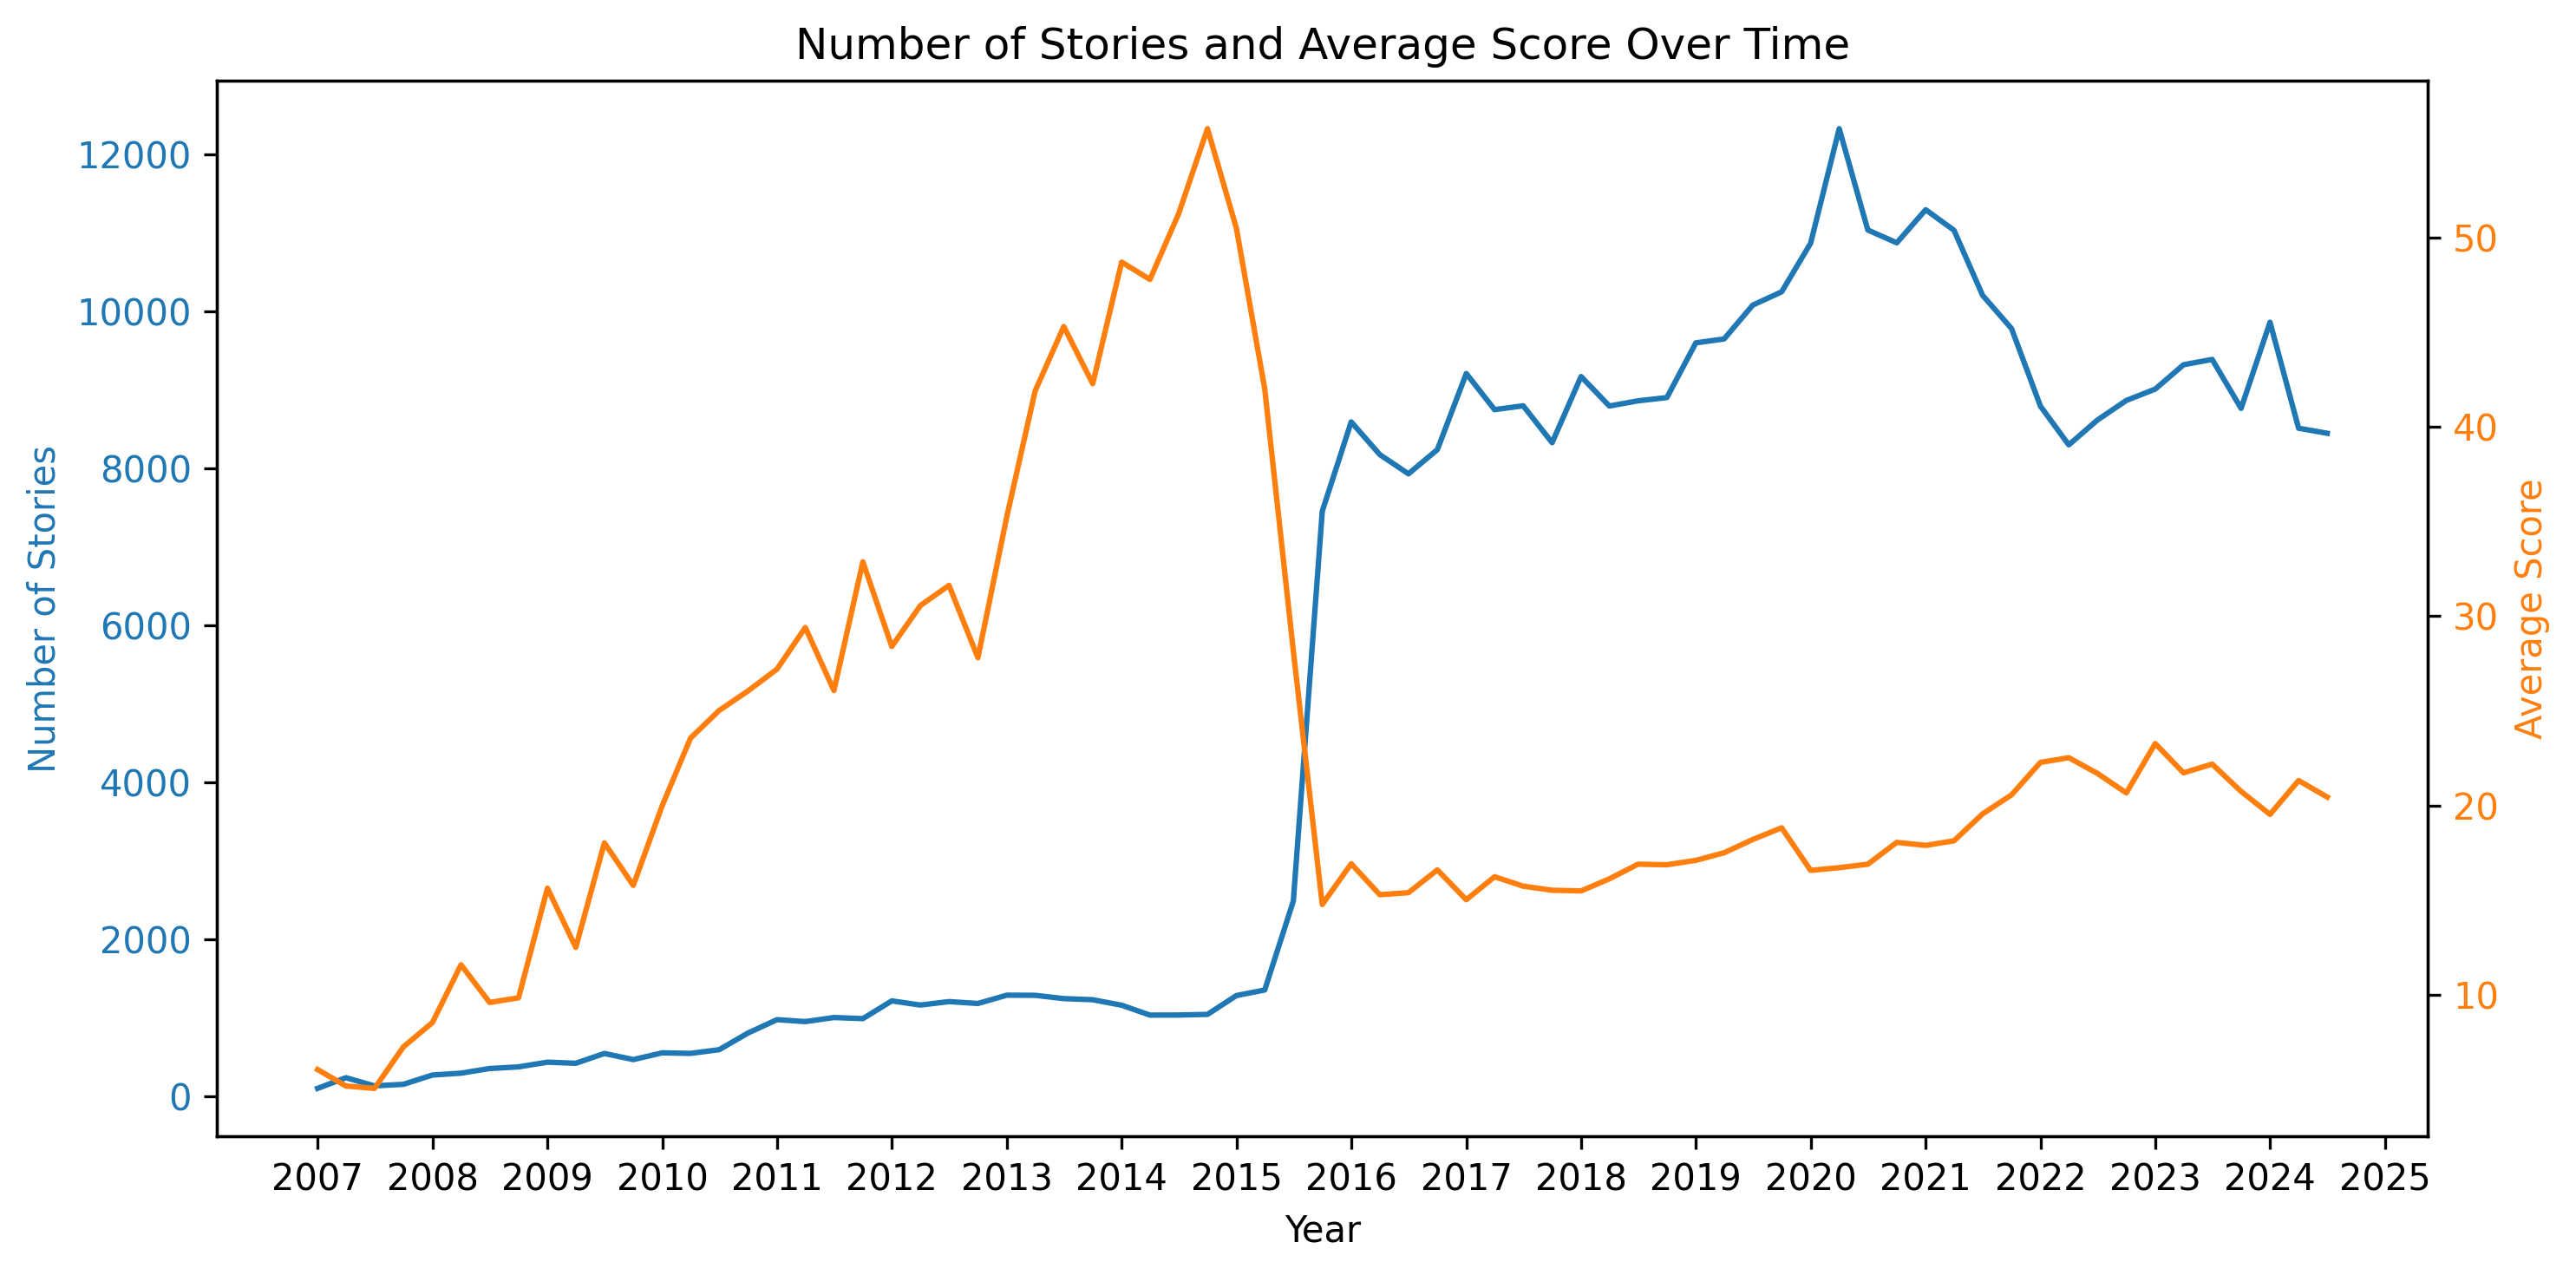

In [27]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Limit the data to September 2024
stories_filtered = df.filter(pl.col("time") < pl.datetime(2024, 10, 1))

stories_with_quarter = stories_filtered.with_columns(
    pl.col("time").dt.truncate("1q").alias("year_quarter")
)

stories_per_quarter = (
    stories_with_quarter.group_by("year_quarter")
    .agg(pl.col("id").count().alias("num_stories"))
    .sort("year_quarter")
)

avg_score_per_quarter = (
    stories_with_quarter.group_by("year_quarter")
    .agg(pl.col("score").mean().alias("avg_score"))
    .sort("year_quarter")
)

fig, ax1 = plt.subplots(figsize=(10, 5), dpi=300)  # Increased figure size and DPI

# Plot number of stories
color = "tab:blue"
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Stories", color=color)
ax1.plot(
    stories_per_quarter["year_quarter"], stories_per_quarter["num_stories"], color=color
)
ax1.tick_params(axis="y", labelcolor=color)

# Create a second y-axis for average score
ax2 = ax1.twinx()
color = "tab:orange"
ax2.set_ylabel("Average Score", color=color)
ax2.plot(
    avg_score_per_quarter["year_quarter"],
    avg_score_per_quarter["avg_score"],
    color=color,
)
ax2.tick_params(axis="y", labelcolor=color)

plt.title("Number of Stories and Average Score Over Time")

# Set x-axis to show only years
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


In [28]:
df = df.filter(pl.col("time") > pl.datetime(2016, 1, 1))

df

id,by,time,title,text,url,score,descendants,kids,deleted,dead,scraping_error,scraped_title,scraped_published_at,scraped_byline,scraped_body,scraped_at,scraped_language,split
i64,str,datetime[μs],str,str,str,i64,i64,list[i64],list[str],bool,str,str,str,str,str,datetime[μs],str,str
10820498,"""trengrj""",2016-01-01 00:16:04,"""Debian creator Ian Murdock die…",null,"""http://www.zdnet.com/article/d…",1,null,null,null,true,"""no_error""","""Debian Linux founder Ian Murdo…",null,"""Written by""","""UPDATED: I'd known Ian Murdock…",2024-11-08 20:50:45,"""en""","""train"""
10820620,"""BuckRogers""",2016-01-01 00:52:20,"""Where are we in the Python 3 t…",null,"""http://www.snarky.ca/the-stage…",4,0,null,null,null,"""no_error""","""Where are we in the Python 3 t…","""2015-12-31T04:35:00.000Z""","""Brett Cannon""",""" …",2024-11-08 12:09:11,"""en""","""train"""
10820781,"""jonbaer""",2016-01-01 01:54:49,"""Algorithms of the Mind – What …",null,"""https://medium.com/deep-learni…",3,0,null,null,null,"""no_error""","""Algorithms of the Mind - Deep …","""2015-05-22T09:27:31.481Z""","""Christopher Nguyen""","""What Machine Learning Teaches …",2024-11-08 14:18:52,"""en""","""train"""
10820785,"""jonbaer""",2016-01-01 01:55:57,"""Demystifying Deep Reinforcemen…",null,"""http://www.nervanasys.com/demy…",3,0,null,null,null,"""no_error""","""KINGGACOR | Situs Slot Gacor H…",null,null,""" KINGGACOR | Situs Slot Gaco…",2024-11-08 08:38:29,"""id""","""train"""
10820925,"""Someone""",2016-01-01 02:51:11,"""Users No Longer Need to Jailbr…",null,"""http://www.darkreading.com/vul…",2,0,null,null,null,"""no_error""","""Users No Longer Need to Jailbr…","""2015-12-29T17:00:00.000Z""","""Ericka Chickowski, Contributin…","""Security practitioners who've …",2024-11-08 07:55:51,"""en""","""train"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
42057787,"""robaato""",2024-11-06 07:18:46,"""Early morning and evening acti…",null,"""https://www.theguardian.com/so…",2,0,null,null,null,"""no_error""","""Early morning and evening acti…","""2024-11-06T05:00:04.000Z""","""Andrew Gregory""","""Being more active in the morni…",2024-11-08 06:04:44,"""en""","""test"""
42061756,"""DocFeind""",2024-11-06 13:12:33,"""X has always had a Nazi proble…",null,"""https://www.theatlantic.com/te…",3,0,null,null,null,"""no_error""","""X Is a White-Supremacist Site""","""2024-11-05T19:41:17Z""","""Charlie Warzel""","""Elon Musk has made one of Twit…",2024-11-07 22:12:22,"""en""","""test"""
42063552,"""Olshansky""",2024-11-06 15:13:49,"""Vibe Checks Are All You Need""",null,"""https://olshansky.substack.com…",3,0,null,null,null,"""no_error""","""Vibe Checks Are All You Need""","""2024-05-29T20:49:40+00:00""","""Daniel Olshansky""","""I’ve been using ChatGPT since …",2024-11-08 14:57:45,"""en""","""test"""


In [29]:
df = df.with_columns(pl.col("score").log().alias("log_score"))

df["log_score"].describe()

statistic,value
str,f64
"""count""",331929.0
"""null_count""",0.0
"""mean""",1.139052
"""std""",1.409683
"""min""",0.0
"""25%""",0.0
"""50%""",0.693147
"""75%""",1.386294
"""max""",8.660601


In [30]:
def serialize_story(story, include_datetime=True):
    time_format = "%A %I:%M %p, %Y-%m-%d" if include_datetime else "%Y-%m-%d"

    return f"""URL: {story["url"]}
Author: {story["scraped_byline"]}
HN Submitter: {story["by"]}
Contents:
{story["scraped_body"].strip()}

Published: {story["time"].strftime(time_format)}
HN Title: {story["title"]}"""


In [31]:
relevant_cols = pl.struct(
    [
        "url",
        "scraped_byline",
        "by",
        "scraped_body",
        "time",
        "title",
    ]
)

# Create two versions of the dataset with different serialization formats
df_with_datetime = df.with_columns(
    relevant_cols.map_elements(
        lambda x: serialize_story(x, include_datetime=True), return_dtype=pl.Utf8
    ).alias("serialized")
)

df_with_date = df.with_columns(
    relevant_cols.map_elements(
        lambda x: serialize_story(x, include_datetime=False), return_dtype=pl.Utf8
    ).alias("serialized")
)

print("Datetime version example:")
print(df_with_datetime["serialized"][0])
print("\nDate-only version example:")
print(df_with_date["serialized"][0])


Datetime version example:
URL: http://www.zdnet.com/article/debian-linux-founder-ian-murdock-dies-at-42-cause-unknown/
Author: Written by
HN Submitter: trengrj
Contents:
UPDATED: I'd known Ian Murdock, founder of Debian Linux and most recently a senior Docker staffer, since 1996. He died this week much too young, 42, in unclear circumstances.  Ian Murdock backed away from saying he would commit suicide in later tweets, but he continued to be seriously troubled by his experiences and died later that night. No details regarding the cause of his death have been disclosed. In a blog posting, Docker merely stated that: "It is with great sadness that we inform you that Ian Murdock passed away on Monday night. This is a tragic loss for his family, for the Docker community, and the broader open source world; we all mourn his passing."The San Francisco Police Department said they had nothing to say about Murdock's death at this time. A copy of what is reputed to be his arrest record is all but 

In [32]:
def write_df_to_remote(df, filename, overwrite=False):
    import s3fs
    from dotenv import load_dotenv
    import os
    from tqdm import tqdm
    import tempfile

    load_dotenv()
    remote_bucket = os.getenv("REMOTE_BUCKET")
    if remote_bucket is None:
        raise ValueError("REMOTE_BUCKET environment variable is not set")

    s3 = s3fs.S3FileSystem()

    if s3.exists(f"s3://{remote_bucket}/{filename}") and not overwrite:
        print(f"File {filename} already exists in remote bucket, skipping")
        return

    # First write to a temporary file to get the total size
    with tempfile.NamedTemporaryFile() as tmp:
        df.write_parquet(tmp.name)
        total_size = os.path.getsize(tmp.name)

        # Now upload with progress bar
        with tqdm(
            total=total_size, unit="B", unit_scale=True, desc=f"Uploading {filename}"
        ) as pbar:
            with s3.open(f"s3://{remote_bucket}/{filename}", "wb") as f:
                tmp.seek(0)
                while True:
                    chunk = tmp.read(8192)
                    if not chunk:
                        break
                    f.write(chunk)
                    pbar.update(len(chunk))


write_df_to_remote(
    df_with_datetime.sample(n=200, seed=42),
    "scraped-stories-with-datetime-tiny.parquet",
    overwrite=True,
)

Uploading scraped-stories-with-datetime-tiny.parquet: 100%|██████████| 1.46M/1.46M [00:00<00:00, 1.91MB/s]


In [33]:
write_df_to_remote(
    df_with_date,
    "scraped-stories-with-date.parquet",
)

Uploading scraped-stories-with-date.parquet: 100%|██████████| 1.94G/1.94G [02:52<00:00, 11.3MB/s]


In [36]:
write_df_to_remote(
    df_with_datetime,
    "scraped-stories-with-datetime.parquet",
    overwrite=True,
)

Uploading scraped-stories-with-datetime.parquet: 100%|██████████| 1.94G/1.94G [03:06<00:00, 10.4MB/s]


/var/folders/x7/yg3vk6qj79n_ktnmzf08w7qm0000gn/T/ipykernel_37528/1008229900.py:2: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  df_with_datetime.group_by("score").agg(pl.count().alias("count")).sort("score")


Score distribution:
shape: (20, 2)
┌───────┬────────┐
│ score ┆ count  │
│ ---   ┆ ---    │
│ i64   ┆ u32    │
╞═══════╪════════╡
│ 1     ┆ 113995 │
│ 2     ┆ 80471  │
│ 3     ┆ 41577  │
│ 4     ┆ 19164  │
│ 5     ┆ 9768   │
│ 6     ┆ 5967   │
│ 7     ┆ 4263   │
│ 8     ┆ 3231   │
│ 9     ┆ 2642   │
│ 10    ┆ 2209   │
│ 11    ┆ 1888   │
│ 12    ┆ 1699   │
│ 13    ┆ 1380   │
│ 14    ┆ 1310   │
│ 15    ┆ 1150   │
│ 16    ┆ 1047   │
│ 17    ┆ 1016   │
│ 18    ┆ 864    │
│ 19    ┆ 796    │
│ 20    ┆ 808    │
└───────┴────────┘


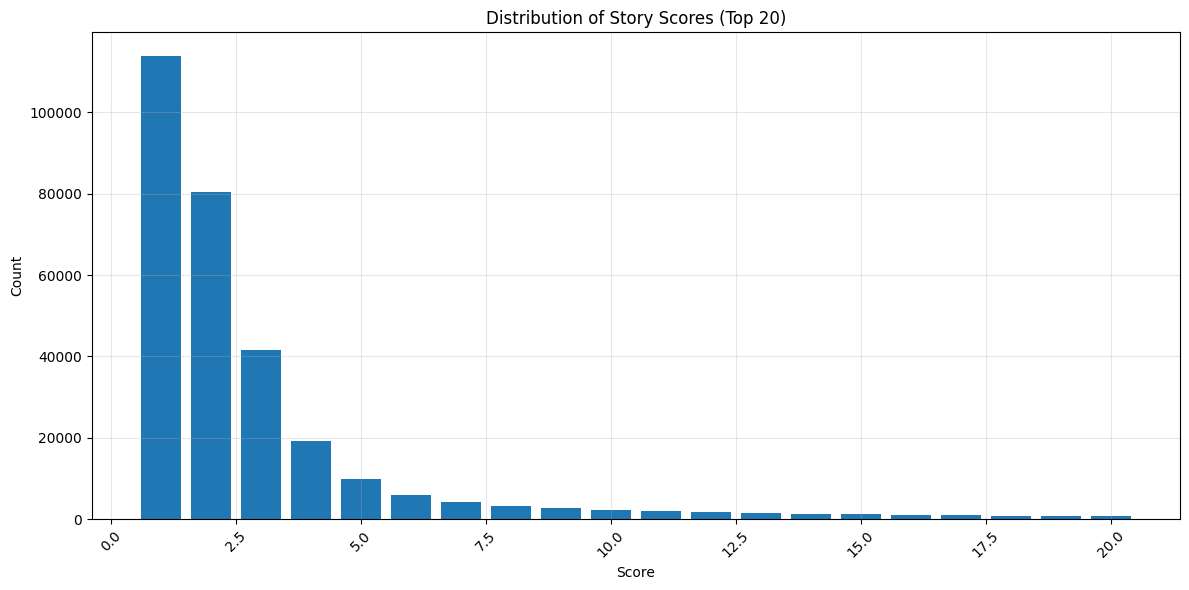

In [44]:
score_dist = (
    df_with_datetime.group_by("score").agg(pl.count().alias("count")).sort("score")
)

print("Score distribution:")
with pl.Config() as cfg:
    cfg.set_tbl_rows(20)
    print(score_dist.head(20))

    import matplotlib.pyplot as plt

    # Create bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(score_dist.head(20)["score"], score_dist.head(20)["count"])

    # Customize chart
    plt.title("Distribution of Story Scores (Top 20)")
    plt.xlabel("Score")
    plt.ylabel("Count")
    plt.grid(True, alpha=0.3)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()
